<a href="https://colab.research.google.com/github/Huy987asd/BT/blob/main/to_yen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
!apt-get install git -y 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git is already the newest version (1:2.25.1-1ubuntu3.11).
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.


In [13]:
pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
#import thư viện
import os 
import numpy as np
from numpy import save
from keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout, LeakyReLU
from keras.optimizers import SGD
import matplotlib.pyplot as plt


#load folder datasets
folder = '/content/drive/MyDrive/Train/'
#tiến hành tiền xử lý dữ liệu
photos, labels = list(), list()
for file in os.listdir(folder):
    output = None
    if file.startswith('co trung'):
        output = 0      
    elif file.startswith('to co chim me'):
        output = 1
    elif file.startswith('to co chim non'):
        output = 2
    elif file.startswith('to yen'):
        output = 3    


    if output is not None:
       
        image = load_img(os.path.join(folder, file), target_size=(200,200,3))
        image = img_to_array(image) 
        
        photos.append(image)
        labels.append(output)

#Xác định kiểu cho mảng
photos = np.array(photos) 
labels = np.array(labels)

photos = photos.astype('float32')/255

labels = to_categorical(labels,4)
model = Sequential()
model.add(Conv2D(64,(3,3), padding='same', input_shape=(200, 200,3)))
model.add(Activation('linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3), padding = 'same'))
model.add(Activation('linear'))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(4, activation='softmax'))

sgd = SGD(lr = 0.001, decay = 1e-6, momentum = 0.9, nesterov= True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(photos, labels, batch_size=128, epochs=20, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 1.3612 - accuracy: 0.4022
Epoch 2/20
1/1 [==============================] - 0s 466ms/step - loss: 1.3425 - accuracy: 0.3804
Epoch 3/20
1/1 [==============================] - 0s 448ms/step - loss: 1.3000 - accuracy: 0.4022
Epoch 4/20
1/1 [==============================] - 0s 480ms/step - loss: 1.3054 - accuracy: 0.4130
Epoch 5/20
1/1 [==============================] - 0s 460ms/step - loss: 1.2774 - accuracy: 0.4457
Epoch 6/20
1/1 [==============================] - 0s 447ms/step - loss: 1.2307 - accuracy: 0.4457
Epoch 7/20
1/1 [==============================] - 0s 448ms/step - loss: 1.1846 - accuracy: 0.5217
Epoch 8/20
1/1 [==============================] - 0s 448ms/step - loss: 1.1382 - accuracy: 0.5652
Epoch 9/20
1/1 [==============================] - 0s 449ms/step - loss: 1.1327 - accuracy: 0.5109
Epoch 10/20
1/1 [==============================] - 0s 453ms/step - loss: 1.0810 - accuracy: 0.6522
Epoch 11/20
1/1 [=====

In [16]:
# Chia ra thành 2 phần để test và train

test_x, test_y = photos[:200], labels[:200]
train_x, train_y = photos[200:], labels[200:]

#Biên dịch chương trình
from keras.backend import categorical_crossentropy
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Augment data with ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
datagen.fit(train_x)

# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

3/3 [==============================] - 1s 43ms/step - loss: 0.6418 - accuracy: 0.7935
Test accuracy: 0.79347825050354


Test loss: 0.6418110132217407
Test accuracy 0.79347825050354


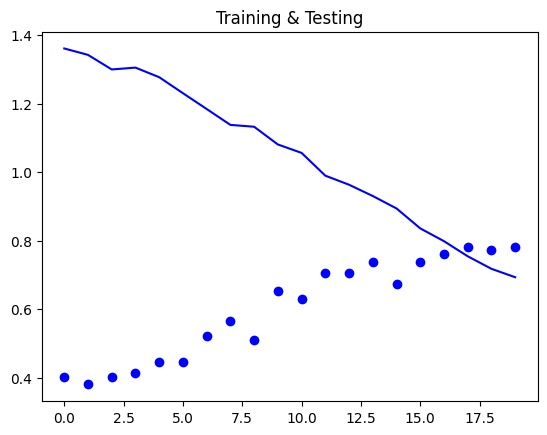

In [17]:
import matplotlib.pyplot as plt
eval = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', eval[0])
print('Test accuracy', eval[1])
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'bo', label = 'Traning')
plt.plot(epochs, loss, 'b', label= 'Test')
plt.title('Training & Testing')
model.save('to yen.h5')

1/1 [==============================] - 0s 225ms/step
[[0.21241997 0.34923732 0.2686758  0.16966686]]


' to co chim me'

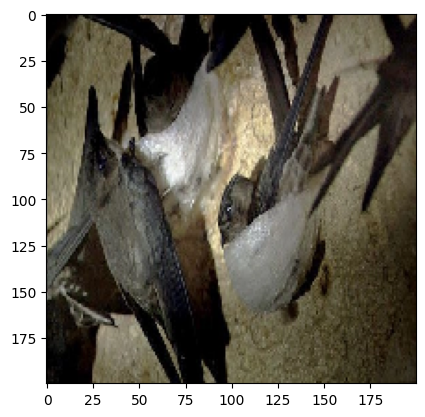

In [18]:
from google.colab import drive
img = load_img('/content/drive/MyDrive/test images (37).jpg', target_size =(200,200,3))
classes = ['co trung', ' to co chim me', 'to co chim non', 'to yen' ]
model.save('to yen.h5')


plt.imshow(img)
imgre = img_to_array(img)
imgre = imgre.reshape(1,200,200,3)
imgre = imgre.astype('float32')/255

predict = model.predict(imgre)
print(predict)
predict_classes =[np.argmax(element) for element in predict]
predict_classes
classes[predict_classes[0]]

1/1 [==============================] - 0s 25ms/step
[[0.03486105 0.10600914 0.15522605 0.7039038 ]]


'to yen'

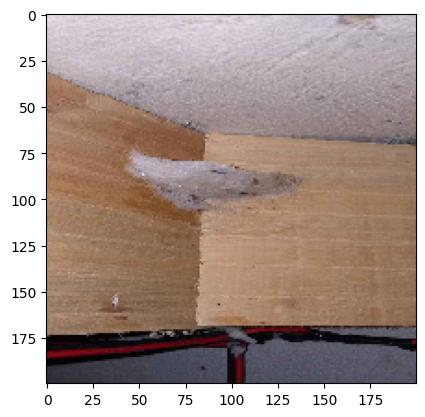

In [19]:
from google.colab import drive
img = load_img('/content/drive/MyDrive/test images (85).jpg', target_size =(200,200,3))
classes = ['co trung', ' to co chim me', 'to co chim non', 'to yen' ]
model.save('to yen')


plt.imshow(img)
imgre = img_to_array(img)
imgre = imgre.reshape(1,200,200,3)
imgre = imgre.astype('float32')/255

predict = model.predict(imgre)
print(predict)
predict_classes =[np.argmax(element) for element in predict]
predict_classes
classes[predict_classes[0]]

1/1 [==============================] - 0s 161ms/step
[[0.12541604 0.7087584  0.02378202 0.14204353]]


' to co chim me'

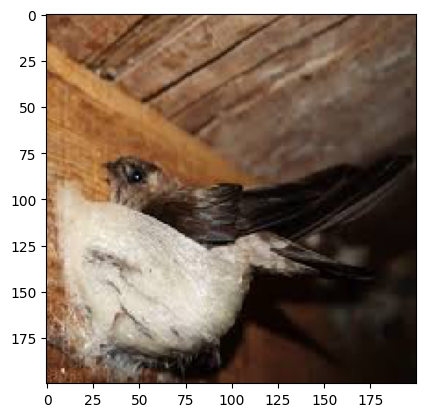

In [ ]:
from google.colab import drive
img = load_img('/content/drive/MyDrive/hình ảnh tổ yến/to co chim me (12).jpg', target_size =(200,200,3))
classes = ['co trung', ' to co chim me', 'to co chim non', 'to yen' ]
model.save('to yen')


plt.imshow(img)
imgre = img_to_array(img)
imgre = imgre.reshape(1,200,200,3)
imgre = imgre.astype('float32')/255

predict = model.predict(imgre)
print(predict)
predict_classes =[np.argmax(element) for element in predict]
predict_classes
classes[predict_classes[0]]

1/1 [==============================] - 0s 27ms/step
[[0.08915992 0.15918401 0.04768638 0.7039697 ]]


'to yen'

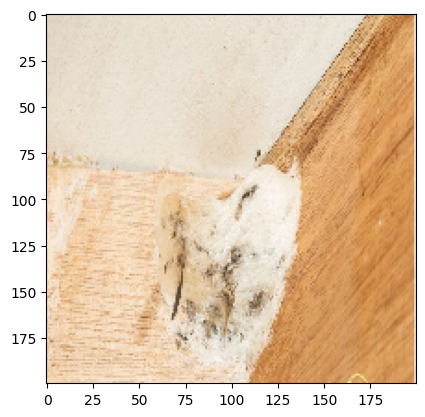

In [20]:
from google.colab import drive
img = load_img('/content/drive/MyDrive/test images (75).jpg', target_size =(200,200,3))
classes = ['co trung', ' to co chim me', 'to co chim non', 'to yen' ]
model.save('to yen')


plt.imshow(img)
imgre = img_to_array(img)
imgre = imgre.reshape(1,200,200,3)
imgre = imgre.astype('float32')/255

predict = model.predict(imgre)
print(predict)
predict_classes =[np.argmax(element) for element in predict]
predict_classes
classes[predict_classes[0]]

1/1 [==============================] - 0s 160ms/step
[[0.0056737  0.01559138 0.5095117  0.46922323]]


'to co chim non'

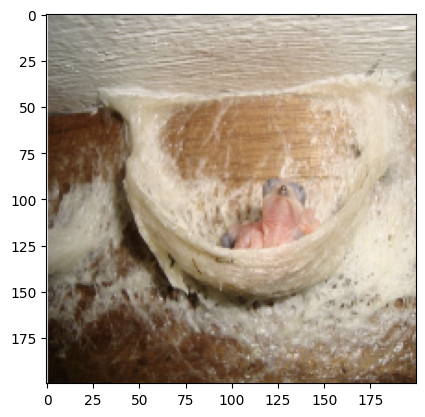

In [ ]:
from google.colab import drive
img = load_img('/content/drive/MyDrive/hình ảnh tổ yến/to co chim non (14).jpg', target_size =(200,200,3))
classes = ['co trung', ' to co chim me', 'to co chim non', 'to yen' ]
model.save('to yen')


plt.imshow(img)
imgre = img_to_array(img)
imgre = imgre.reshape(1,200,200,3)
imgre = imgre.astype('float32')/255

predict = model.predict(imgre)
print(predict)
predict_classes =[np.argmax(element) for element in predict]
predict_classes
classes[predict_classes[0]]

1/1 [==============================] - 0s 152ms/step
[[0.01963012 0.07304655 0.08921673 0.8181066 ]]


'to yen'

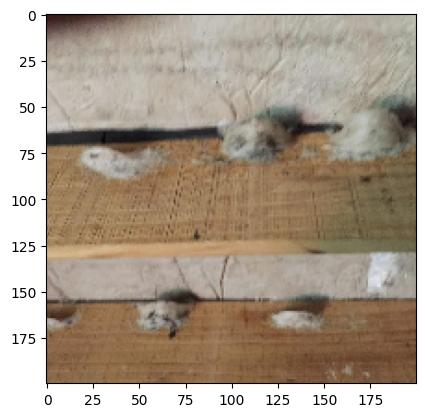

In [ ]:
from google.colab import drive
img = load_img('/content/drive/MyDrive/hình ảnh tổ yến/to yen (11).jpg', target_size =(200,200,3))
classes = ['co trung', ' to co chim me', 'to co chim non', 'to yen' ]
model.save('to yen')


plt.imshow(img)
imgre = img_to_array(img)
imgre = imgre.reshape(1,200,200,3)
imgre = imgre.astype('float32')/255

predict = model.predict(imgre)
print(predict)
predict_classes =[np.argmax(element) for element in predict]
predict_classes
classes[predict_classes[0]]

1/1 [==============================] - 0s 490ms/step
[[0.0096244  0.02062795 0.06681711 0.9029305 ]]


'to yen'

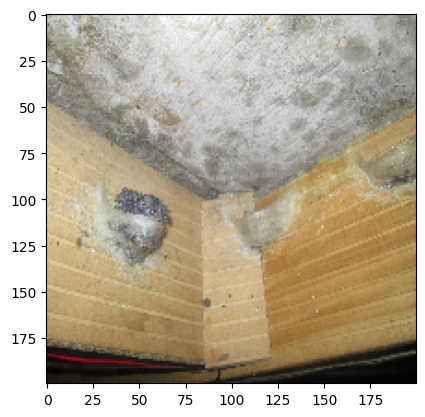

In [ ]:
from google.colab import drive
img = load_img('/content/drive/MyDrive/hình ảnh tổ yến/to yen (23).JPG', target_size =(200,200,3))
classes = ['co trung', ' to co chim me', 'to co chim non', 'to yen' ]
model.save('to yen')


plt.imshow(img)
imgre = img_to_array(img)
imgre = imgre.reshape(1,200,200,3)
imgre = imgre.astype('float32')/255

predict = model.predict(imgre)
print(predict)
predict_classes =[np.argmax(element) for element in predict]
predict_classes
classes[predict_classes[0]]

1/1 [==============================] - 0s 460ms/step
[[0.39578393 0.45520338 0.11011782 0.0388949 ]]


' to co chim me'

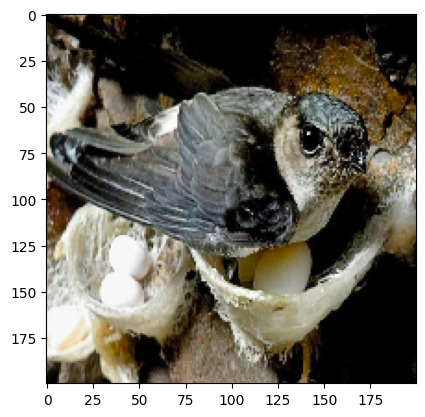

In [ ]:
from google.colab import drive
img = load_img('/content/drive/MyDrive/yen co trung (1).png', target_size =(200,200,3))
classes = ['co trung', ' to co chim me', 'to co chim non', 'to yen' ]
model.save('to yen')


plt.imshow(img)
imgre = img_to_array(img)
imgre = imgre.reshape(1,200,200,3)
imgre = imgre.astype('float32')/255

predict = model.predict(imgre)
print(predict)
predict_classes =[np.argmax(element) for element in predict]
predict_classes
classes[predict_classes[0]]

In [ ]:
from google.colab import drive
img = load_img('/content/drive/MyDrive/test2.jpg', target_size =(200,200,3))
classes = ['co trung', ' to co chim me', 'to co chim non', 'to yen' ]
model.save('to yen')


plt.imshow(img)
imgre = img_to_array(img)
imgre = imgre.reshape(1,200,200,3)
imgre = imgre.astype('float32')/255

predict = model.predict(imgre)
print(predict)
predict_classes =[np.argmax(element) for element in predict]
predict_classes
classes[predict_classes[0]]

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
